In [1]:
# 필요 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

## 1. 국토교통부_교량_2022정제데이터에서의 준공년도와 상부구조

In [3]:
# 1. 국토교통부_교량_2022정제 데이터 불러오기
df1 = pd.read_csv('C:/Users/chunc/Desktop/데이터 샘플/국토교통부_교량_20220627_정제.csv')
df1.head()

,교량명,시설물종별등급구분,시도명,시군구명,교량시작점위도,교량시작점경도,교량종료점위도,교량종료점경도,교량연장,교량폭,차로수,상부구조형식,교량준공연도,최종안전점검일자,최종안전점검결과,설계활하중,허용통행하중,준공 후 경과년수
0,진위교,2,경기도,평택시,37.100957,127.064200,37.102066,127.063897,125.0,21.0,4,PSCI거더교,1986,2021-12-23,B,DB-24,43.2,37
1,풍계교,3,경기도,이천시,37.133443,127.602141,37.133710,127.601766,55.0,20.0,2,RC슬래브교,1996,2021-12-02,B,DB-24,43.2,27
2,태평교,3,경기도,여주시,37.200325,127.545522,37.200578,127.545179,43.8,19.5,4,PSCI거더교,1991,2021-12-02,B,DB-24,43.2,32
3,장평교,2,경기도,이천시,37.225055,127.524158,37.225717,127.523299,105.0,19.5,4,RC슬래브교,1993,2021-12-31,B,DB-24,43.2,30
4,풍계교,3,경기도,이천시,37.149231,127.626386,37.148733,127.626393,44.0,10.0,2,RC슬래브교,1988,2021-12-02,B,DB-18,32.4,35


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5993 entries, 0 to 5992
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   교량명        5993 non-null   object 
 1   시설물종별등급구분  5993 non-null   object 
 2   시도명        5993 non-null   object 
 3   시군구명       5993 non-null   object 
 4   교량시작점위도    5993 non-null   float64
 5   교량시작점경도    5993 non-null   float64
 6   교량종료점위도    5993 non-null   float64
 7   교량종료점경도    5993 non-null   float64
 8   교량연장       5993 non-null   float64
 9   교량폭        5993 non-null   float64
 10  차로수        5993 non-null   int64  
 11  상부구조형식     5993 non-null   object 
 12  교량준공연도     5993 non-null   int64  
 13  최종안전점검일자   5993 non-null   object 
 14  최종안전점검결과   5993 non-null   object 
 15  설계활하중      5993 non-null   object 
 16  허용통행하중     5993 non-null   float64
 17  준공 후 경과년수  5993 non-null   int64  
dtypes: float64(7), int64(3), object(8)
memory usage: 842.9+ KB


In [5]:
# 상부구조의 종류
df1['상부구조형식'].unique()

array(['PSCI거더교', 'RC슬래브교', '프리플렉스거더교', '강박스거더교', '라멘교', 'RC중공슬래브교',
       '강플레이트거더교', '아치교', 'PSC박스거더교', '엑스트라도즈드교', '기타', 'PSC슬래브교',
       'RCT거더교', 'PSC중공슬래브교', '강I거더교', '사장교', 'RC박스거더교', '트러스교', '목교'],
      dtype=object)

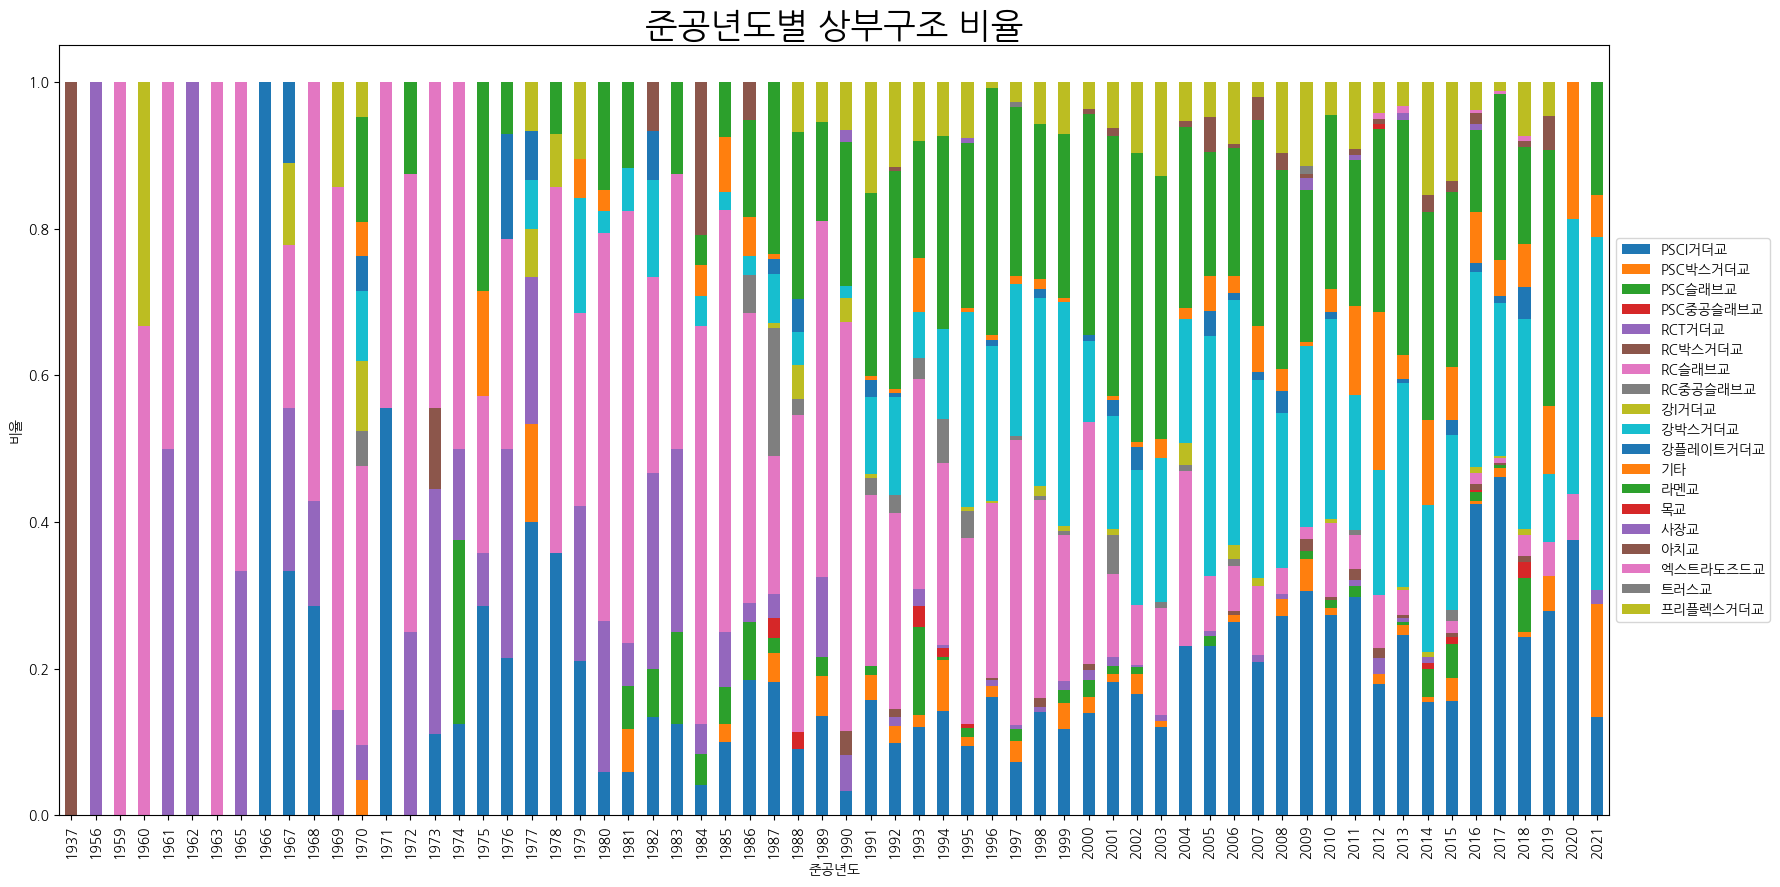

In [6]:
# 준공연도별 상부구조 비율
result1 = df1.groupby(['교량준공연도', '상부구조형식'])['상부구조형식'].count().unstack().apply(lambda x: x / x.sum(), axis=1)

result1.plot(kind = 'bar', stacked = True, figsize = (20,10))
plt.title('준공년도별 상부구조 비율', fontsize = 25)
plt.xlabel('준공년도')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [7]:
# 새로운 상부구조 범주 생성
def category_struc(struc):
    if struc.endswith('거더교'):
        return '거더교'
    elif struc.endswith('슬래브교'):
        return '슬래브교'
    elif struc.endswith('라멘교'):
        return '라멘교'
    elif struc.endswith('사장교'):
        return '사장교'
    elif struc.endswith('아치교'):
        return '아치교'
    elif struc.endswith('트러스교'):
        return '트러스교'
    else:
        return '기타'

In [8]:
df1['New_Struc'] = df1['상부구조형식'].apply(lambda x: category_struc(x))

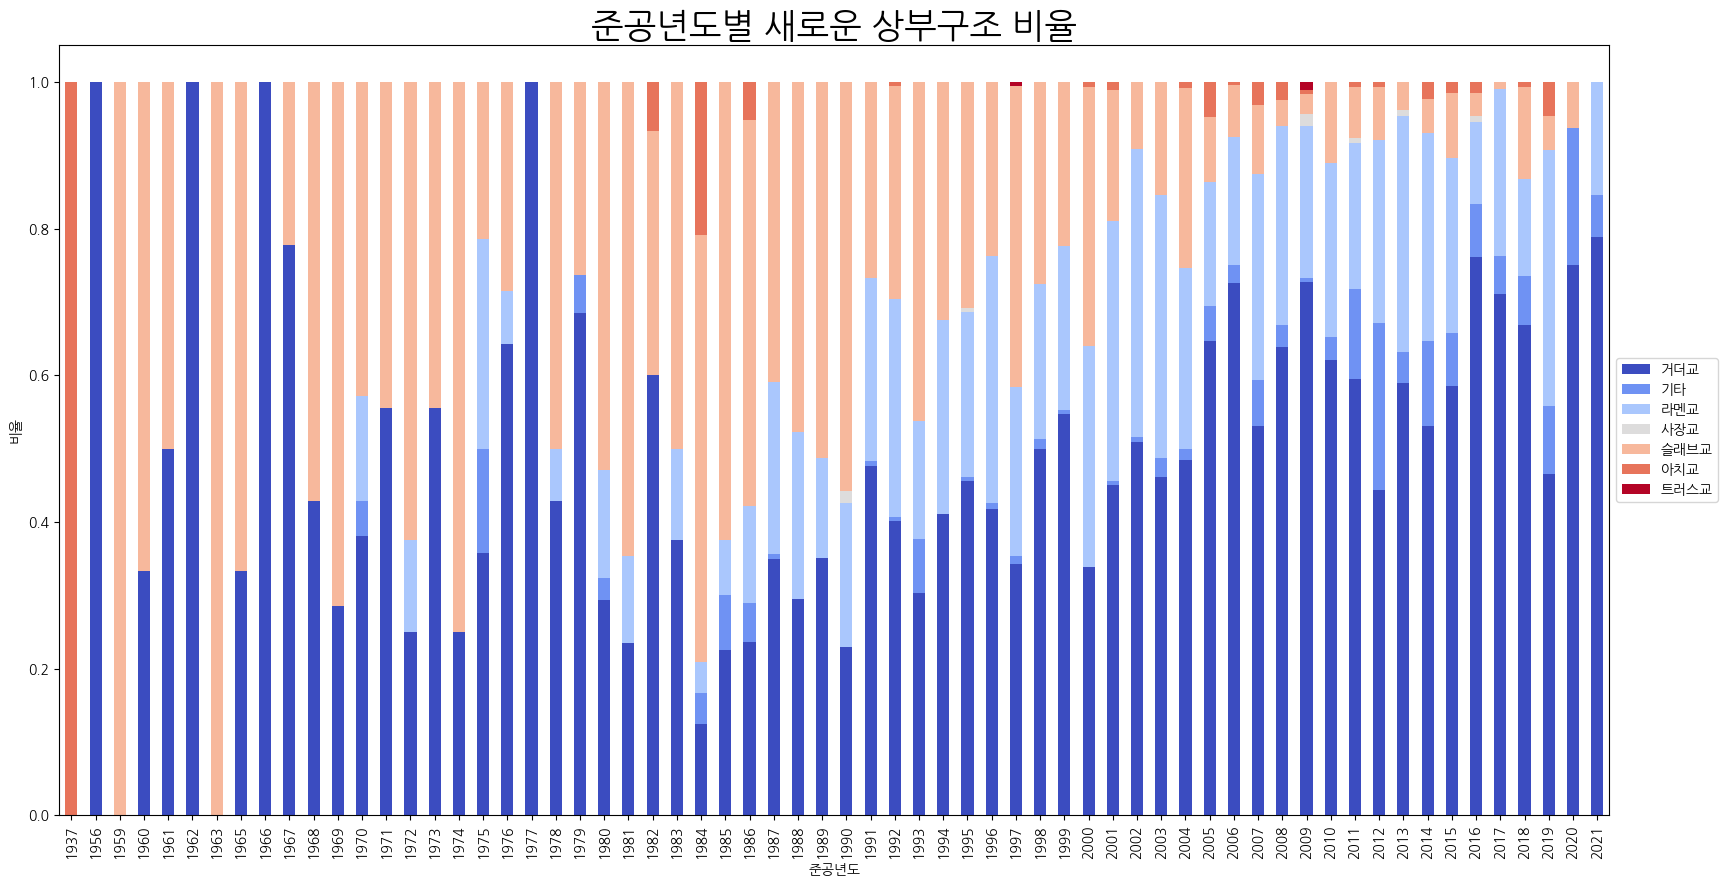

In [9]:
# 준공년도별 새로운 상부구조 비율
result2 = df1.groupby(['교량준공연도', 'New_Struc'])['New_Struc'].count().unstack().apply(lambda x: x / x.sum(), axis=1)

result2.plot(kind = 'bar', stacked = True, figsize = (20,10), cmap = 'coolwarm')
plt.title('준공년도별 새로운 상부구조 비율', fontsize = 25)
plt.xlabel('준공년도')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

## 2. 2022교량 현황_전처리 데이터에서의 준공년도와 상부구조

In [10]:
df2 = pd.read_csv('C:/Users/chunc/Desktop/데이터 샘플/2022교량현황(2차전처리).csv')
df2.head()

,시설명,시도,시군구,총길이,총폭,경간수,최대경간장,상부구조,설계하중,교통량,준공년도,준공후경과년수
0,가남JCT육교(강릉),경기도,여주군,225.0,16.2,5,45.0,강박스거더교,DB-24,24562.0,1994,29
1,가남JCT육교(인천),경기도,여주군,225.0,16.2,5,45.0,강박스거더교,DB-24,24562.0,1994,29
2,가남교(강릉0),경기도,여주군,25.0,19.3,1,25.0,프리플렉스거더교,DB-24,61826.0,2003,20
3,가남교(강릉1),경기도,여주군,25.0,5.6,1,25.0,PSCI거더교,DB-24,61826.0,2010,13
4,가남교(인천),경기도,여주군,25.0,19.3,1,25.0,프리플렉스거더교,DB-24,61826.0,2003,20


In [11]:
# 상부구조 확인
df2['상부구조'].unique()

array(['강박스거더교', '프리플렉스거더교', 'PSCI거더교', '라멘교', 'PSC박스거더교', 'PSC슬래브교',
       'RC슬래브교', 'PSC중공슬래브교', 'RC중공슬래브교', '아치교', '강플레이트거더교', '강I거더교',
       '기타', '트러스교', 'RCT거더교', 'RC박스거더교', '엑스트라도즈드교', '사장교'], dtype=object)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7373 entries, 0 to 7372
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시설명      7373 non-null   object 
 1   시도       7373 non-null   object 
 2   시군구      7373 non-null   object 
 3   총길이      7373 non-null   float64
 4   총폭       7373 non-null   float64
 5   경간수      7373 non-null   int64  
 6   최대경간장    7373 non-null   float64
 7   상부구조     7373 non-null   object 
 8   설계하중     7373 non-null   object 
 9   교통량      5333 non-null   float64
 10  준공년도     7373 non-null   int64  
 11  준공후경과년수  7373 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 691.3+ KB


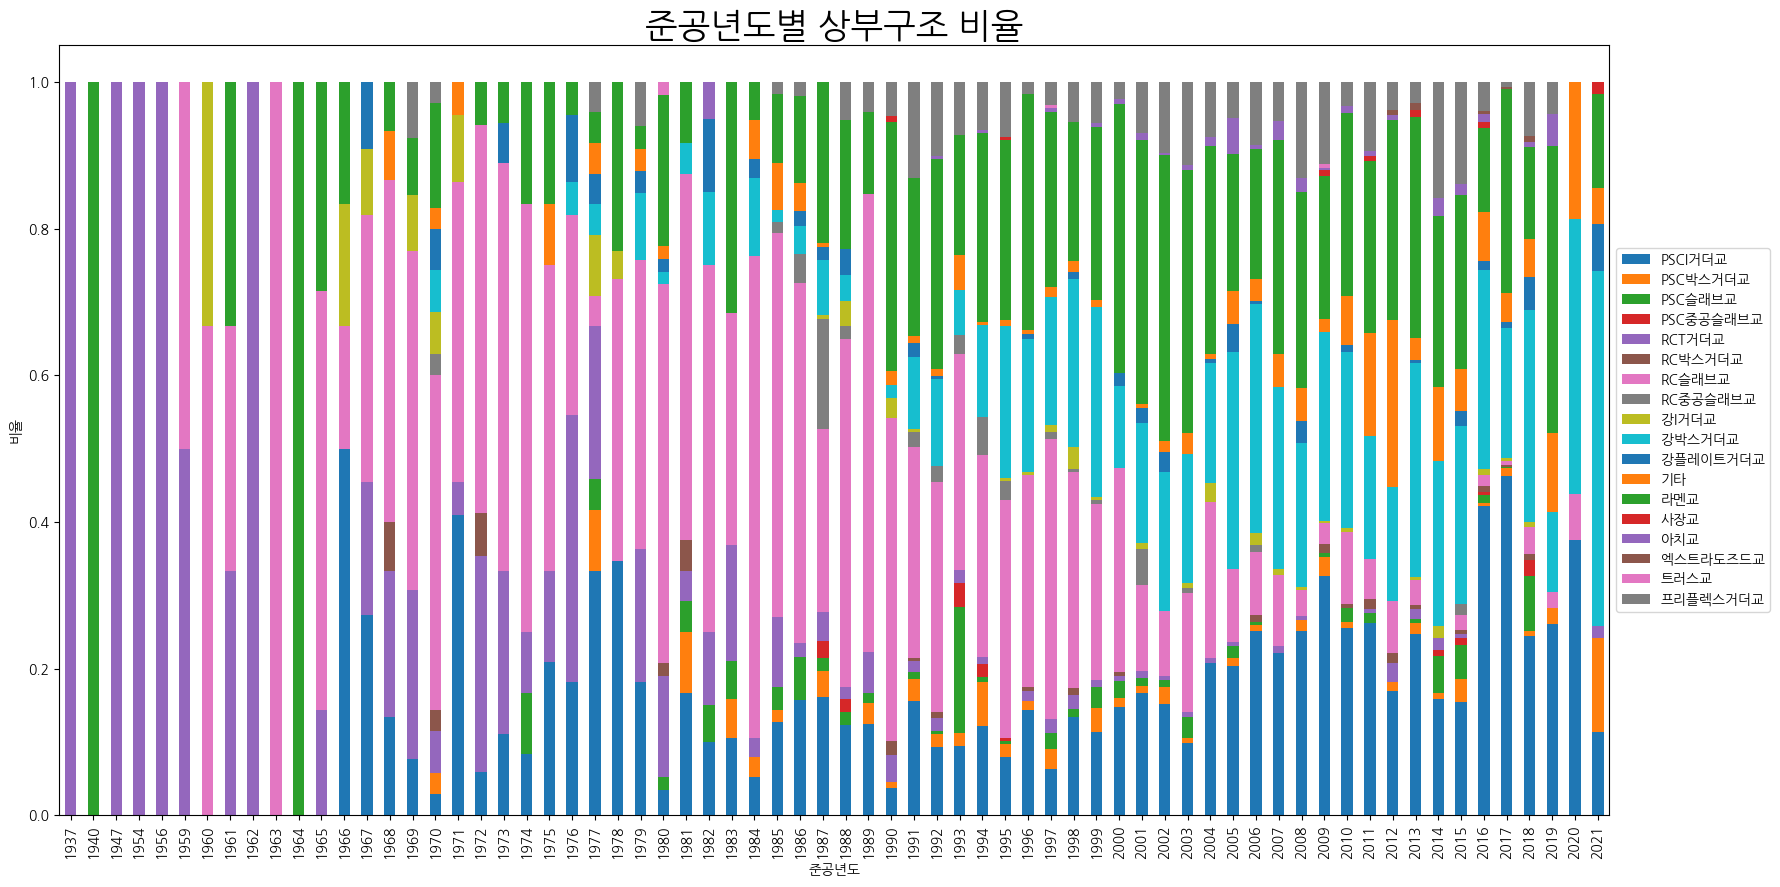

In [13]:
# 준공연도별 상부구조 비율
result3 = df2.groupby(['준공년도', '상부구조'])['상부구조'].count().unstack().apply(lambda x: x / x.sum(), axis=1)

result3.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('준공년도별 상부구조 비율', fontsize=25)
plt.xlabel('준공년도')
plt.ylabel('비율')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
# 새로운 상부구조 범주 생성
def category_struc(struc):
    if struc.endswith('거더교'):
        return '거더교'
    elif struc.endswith('슬래브교'):
        return '슬래브교'
    elif struc.endswith('라멘교'):
        return '라멘교'
    elif struc.endswith('사장교'):
        return '사장교'
    elif struc.endswith('아치교'):
        return '아치교'
    elif struc.endswith('트러스교'):
        return '트러스교'
    else:
        return '기타'

In [15]:
df2['New_Struc'] = df2['상부구조'].apply(lambda x: category_struc(x))

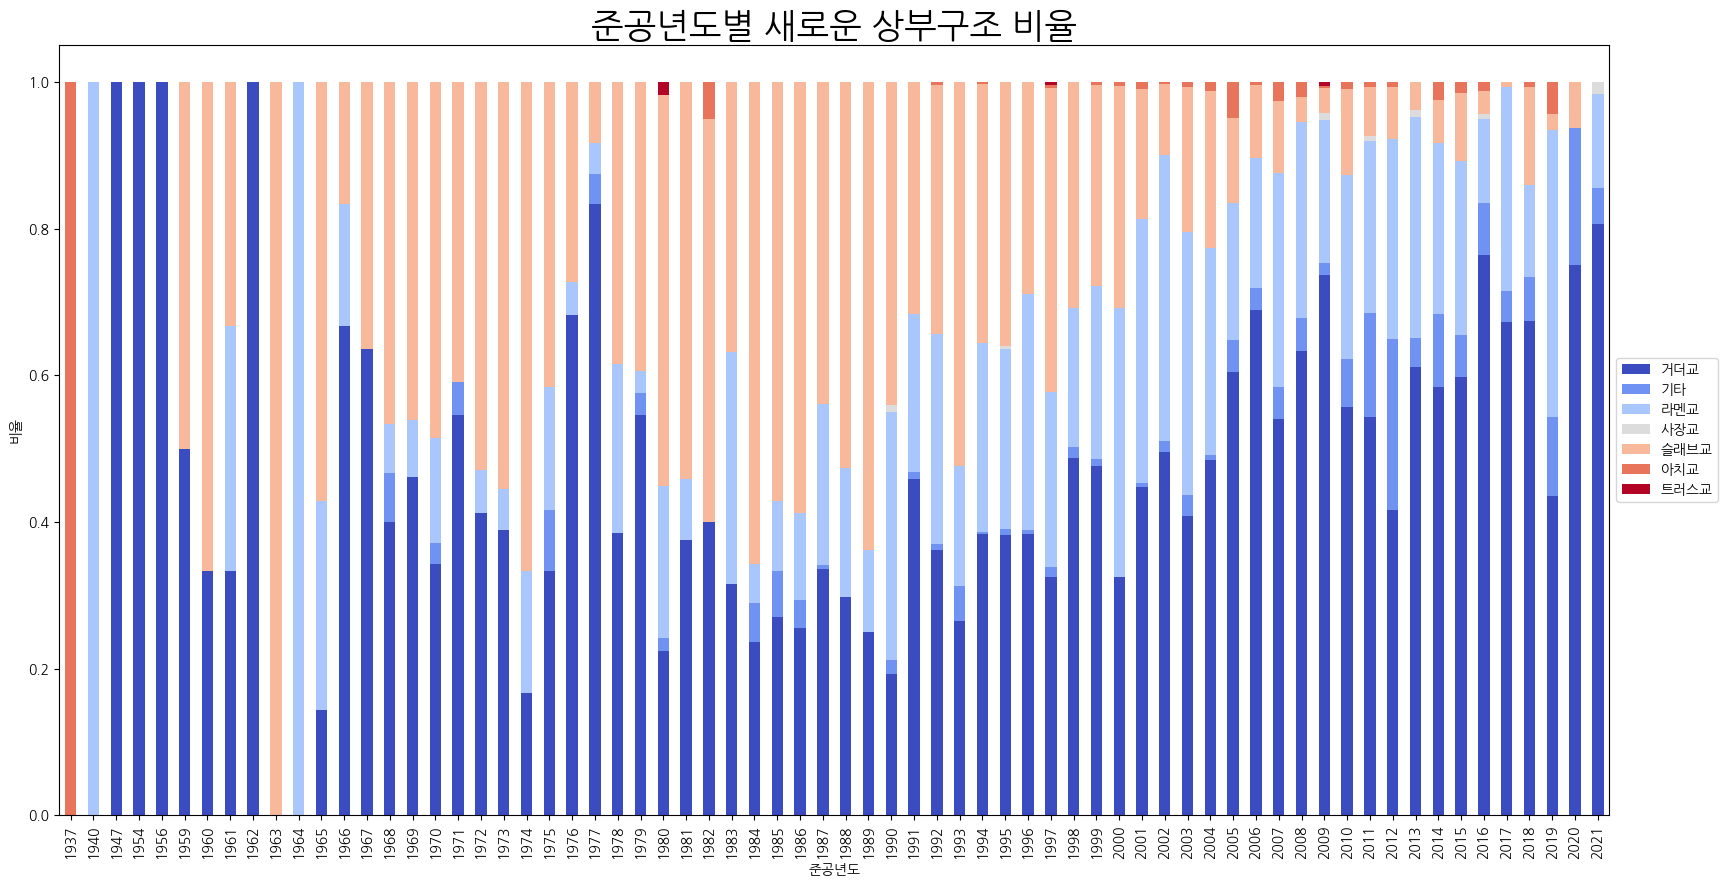

In [16]:
# 준공년도별 새로운 상부구조 비율
result4 = df2.groupby(['준공년도', 'New_Struc'])['New_Struc'].count().unstack().apply(lambda x: x / x.sum(), axis=1)

result4.plot(kind='bar', stacked=True, figsize=(20,10), cmap = 'coolwarm')
plt.title('준공년도별 새로운 상부구조 비율', fontsize=25)
plt.xlabel('준공년도')
plt.ylabel('비율')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [17]:
# 데이터별로 상부구조의 개수확인
df1['상부구조형식'].unique()

array(['PSCI거더교', 'RC슬래브교', '프리플렉스거더교', '강박스거더교', '라멘교', 'RC중공슬래브교',
       '강플레이트거더교', '아치교', 'PSC박스거더교', '엑스트라도즈드교', '기타', 'PSC슬래브교',
       'RCT거더교', 'PSC중공슬래브교', '강I거더교', '사장교', 'RC박스거더교', '트러스교', '목교'],
      dtype=object)

In [18]:
df2['상부구조'].unique()

array(['강박스거더교', '프리플렉스거더교', 'PSCI거더교', '라멘교', 'PSC박스거더교', 'PSC슬래브교',
       'RC슬래브교', 'PSC중공슬래브교', 'RC중공슬래브교', '아치교', '강플레이트거더교', '강I거더교',
       '기타', '트러스교', 'RCT거더교', 'RC박스거더교', '엑스트라도즈드교', '사장교'], dtype=object)

In [19]:
len(df1['상부구조형식'].unique())

19

In [20]:
len(df2['상부구조'].unique())

18


## <상부구조에서 두 데이터간 일치 여부>
강박스 거더교, RC슬래브교, PSCI거더교, 프리플렉스거더교, 라멘교, RC중공슬래브교, 강플레이트거더교, 아치교, PSC박스거더교, 엑스트라도즈드교, 기타, PSC슬래브교, RCT거더교,
PSC중공슬래브교, 강I거더교, 사장교, RC박스거더교, 트러스교 -> 동일

### 1. 국토교통부_교량_20220627_정제 데이터에서만 상부구조가 목교인 데이터가 추가로 존재함 
만약, 상부구조로 분류하고자 할때 기타로 통합하거나, 데이터가 적다면 삭제하고 두 데이터를 merge하는게 나아보임

In [21]:
# 상부구조가 목교인 데이터는 하나이다
df1[df1['상부구조형식'] == '목교']

,교량명,시설물종별등급구분,시도명,시군구명,교량시작점위도,교량시작점경도,교량종료점위도,교량종료점경도,교량연장,교량폭,차로수,상부구조형식,교량준공연도,최종안전점검일자,최종안전점검결과,설계활하중,허용통행하중,준공 후 경과년수,New_Struc
1272,방학동674-35 인도교,기타,서울특별시,도봉구,37.661707,127.038517,37.661838,127.038511,16.0,2.6,0,목교,2012,2020-11-30,A,미상,0.0,11,기타


In [22]:
# 목교를 제외한 데이터로 다시 생성
copy_df = df1[df1['상부구조형식'] != '목교']
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5992 entries, 0 to 5992
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   교량명        5992 non-null   object 
 1   시설물종별등급구분  5992 non-null   object 
 2   시도명        5992 non-null   object 
 3   시군구명       5992 non-null   object 
 4   교량시작점위도    5992 non-null   float64
 5   교량시작점경도    5992 non-null   float64
 6   교량종료점위도    5992 non-null   float64
 7   교량종료점경도    5992 non-null   float64
 8   교량연장       5992 non-null   float64
 9   교량폭        5992 non-null   float64
 10  차로수        5992 non-null   int64  
 11  상부구조형식     5992 non-null   object 
 12  교량준공연도     5992 non-null   int64  
 13  최종안전점검일자   5992 non-null   object 
 14  최종안전점검결과   5992 non-null   object 
 15  설계활하중      5992 non-null   object 
 16  허용통행하중     5992 non-null   float64
 17  준공 후 경과년수  5992 non-null   int64  
 18  New_Struc  5992 non-null   object 
dtypes: float64(7), int64(3), object(9)
memory usage: 936.

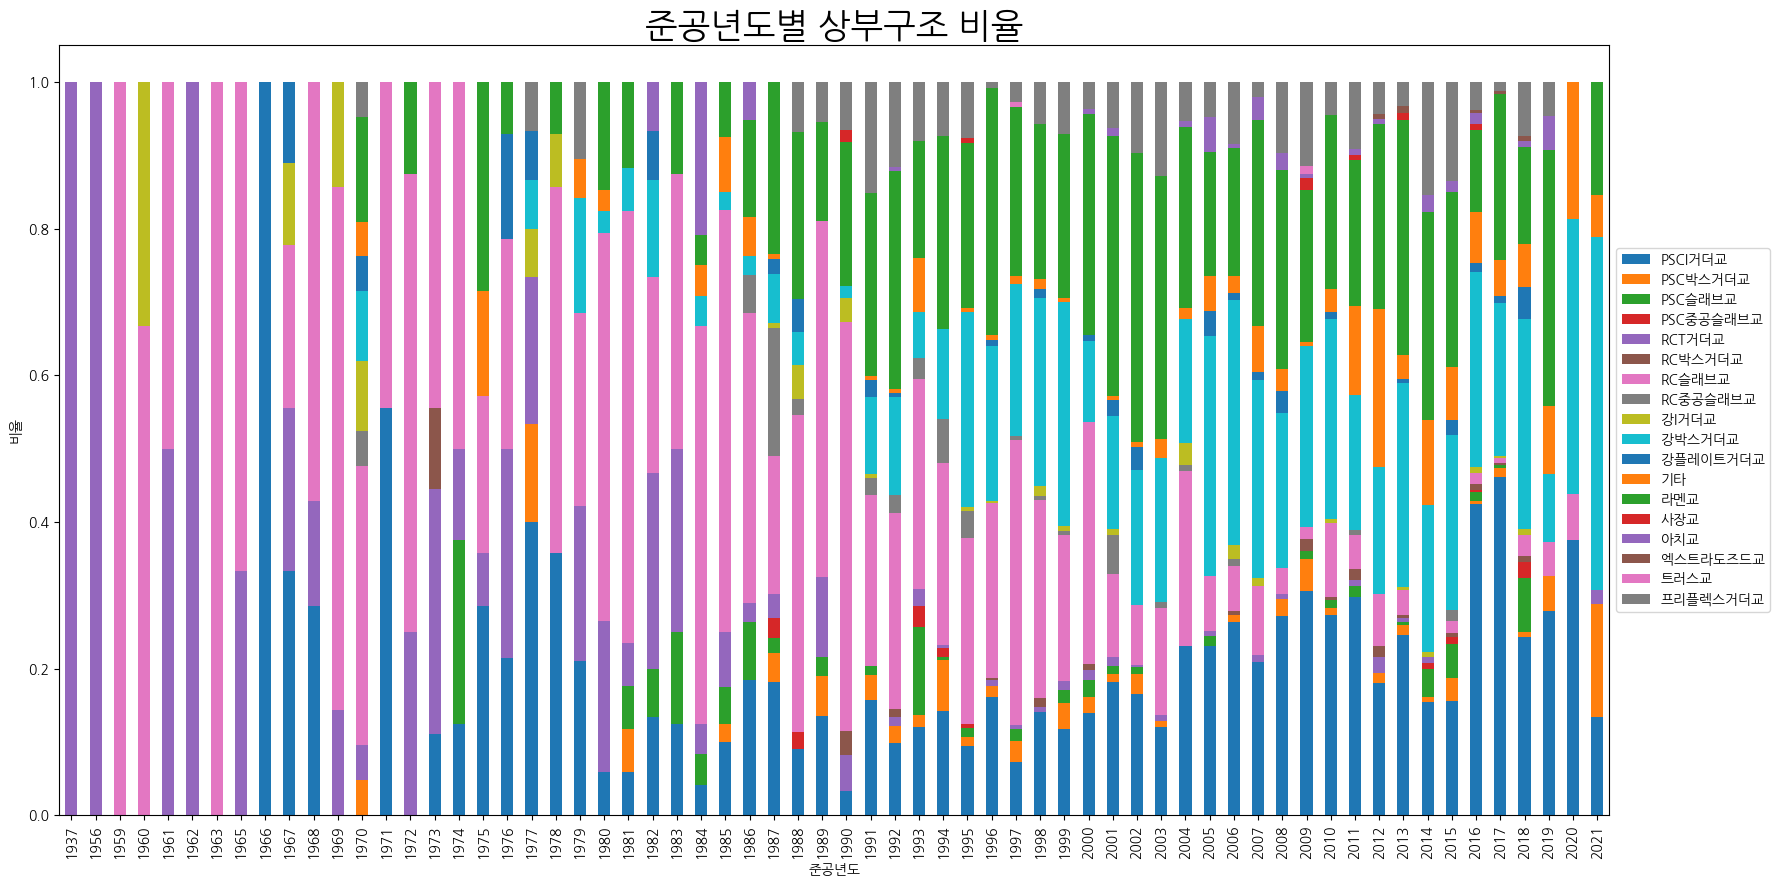

In [23]:
# 준공연도별 상부구조 비율
result5 = copy_df.groupby(['교량준공연도', '상부구조형식'])['상부구조형식'].count().unstack().apply(lambda x: x / x.sum(), axis=1)

result5.plot(kind = 'bar', stacked = True, figsize = (20,10))
plt.title('준공년도별 상부구조 비율', fontsize = 25)
plt.xlabel('준공년도')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

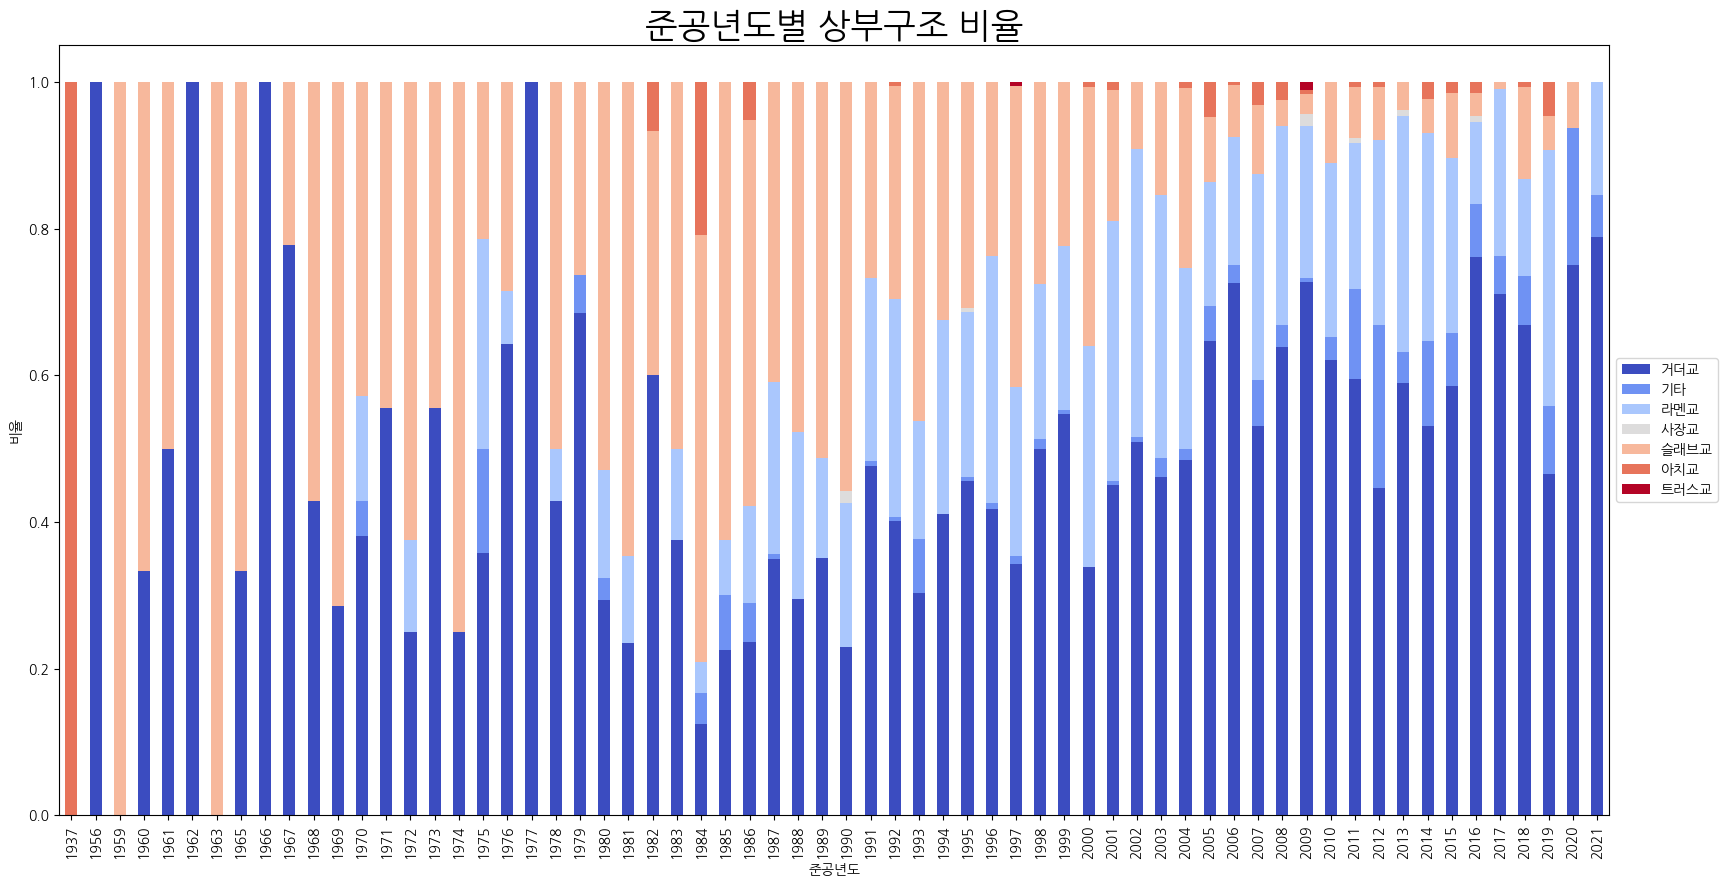

In [24]:
# 준공연도별 상부구조 비율
result6 = copy_df.groupby(['교량준공연도', 'New_Struc'])['New_Struc'].count().unstack().apply(lambda x: x / x.sum(), axis=1)

result6.plot(kind = 'bar', stacked = True, figsize = (20,10), cmap = 'coolwarm')
plt.title('준공년도별 상부구조 비율', fontsize = 25)
plt.xlabel('준공년도')
plt.ylabel('비율')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

### 2.월드컵대교의 상부구조 명칭이 두 데이터가 다르게 표시됨
* 국토교통부_교량_20220627_정제 데이터에서는 교량명은 올림픽대로(접속교) 강박스거더교형식인데, 2022교량현황_전처리데이터에서는 월드컵대교 주경간교 사장교형식으로 표기되어있음
* 위키백과에 따르면 설계는 사장교라 되어있고 최대경간장이 비대칭 복합사장교 + 강박스터교라고 되어있는 것으로보아 혼용의 의미로 추측 각각 다르게 판단해야 할 듯함
https://ko.wikipedia.org/wiki/%EC%9B%94%EB%93%9C%EC%BB%B5%EB%8C%80%EA%B5%90


In [25]:
# 국토교통부_교량_20220627_정제 데이터에서의 월드컵대교
copy_df[copy_df['교량명'].str.startswith('월드컵')][['교량명', '상부구조형식']]

,교량명,상부구조형식
1215,월드컵대교(접속교),강박스거더교


In [26]:
# 2022교량현황_전처리데이터에서의 월드컵대교
df2[df2['시설명'].str.startswith('월드컵')][['시설명', '상부구조']]

,시설명,상부구조
4024,월드컵대교 남단연결로 RAMP-A교,강박스거더교
4025,월드컵대교 남단연결로 RAMP-F교,강박스거더교
4026,월드컵대교 남단연결로 강남RAMP-BR2교,강박스거더교
4027,월드컵대교 남단접속교(강남방향),강플레이트거더교
4028,월드컵대교 남단접속교(강북방향),강플레이트거더교
4029,월드컵대교 북단연결로 RAMP-D교,강박스거더교
4030,월드컵대교 북단연결로 RAMP-E교,강박스거더교
4031,월드컵대교 북단접속교(강남방향),강플레이트거더교
4032,월드컵대교 북단접속교(강북방향),강플레이트거더교
4033,월드컵대교 주경간교,사장교


## 3. 국토교통부_교량_20220627_정제 데이터에서 경과년수에 따른 상부구조 변화 시각화

In [27]:
# 준공 후 경과년수에 따른 교통량 합계
def category_year(myYear):
    if myYear < 5:
        return '5년 미만'
    elif myYear < 10:
        return '5년 이상 10년 미만'
    elif myYear < 15:
        return '10년 이상 15년 미만'
    elif myYear < 20:
        return '15년 이상 20년 미만'
    elif myYear < 25:
        return '20년 이상 25년 미만'
    else:
        return '25년 이상'

In [28]:
# 앞서서 목교인 데이터를 제외했던 정제 데이터를 사용
copy_df['Cum_year'] = copy_df['준공 후 경과년수'].apply(lambda x: category_year(x))

C:\Users\chunc\AppData\Local\Temp\ipykernel_14780\700798614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df['Cum_year'] = copy_df['준공 후 경과년수'].apply(lambda x: category_year(x))


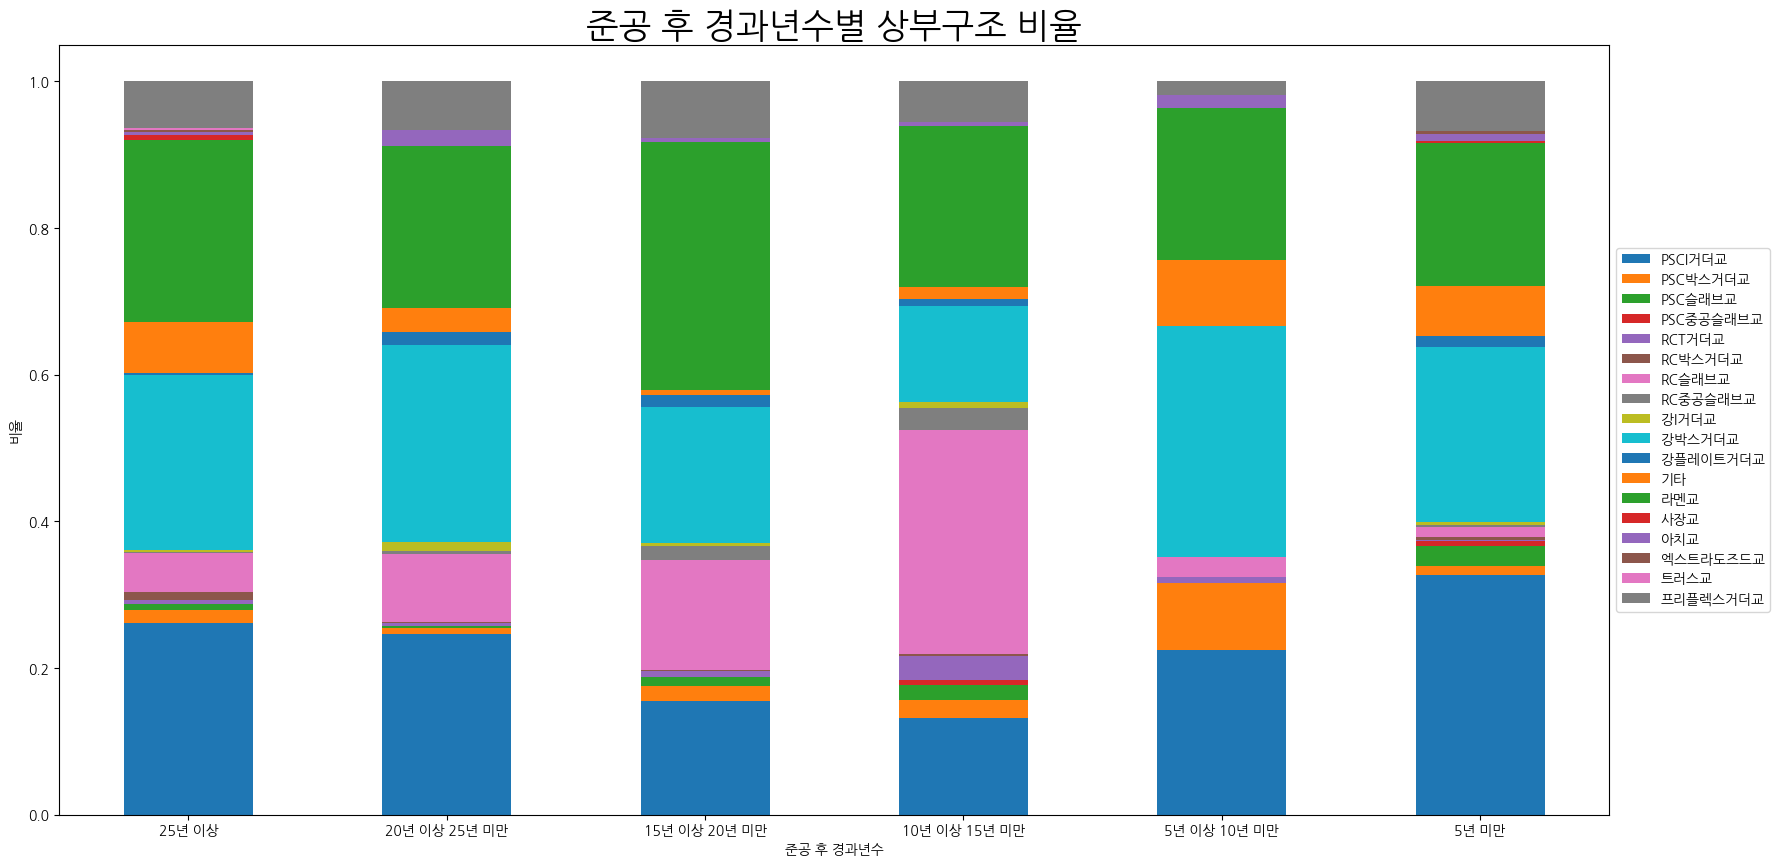

In [29]:
# 준공 후 경과년수별 상부구조 비율
new1 = copy_df.groupby(['Cum_year', '상부구조형식'])['상부구조형식'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
labels = ['25년 이상', '20년 이상 25년 미만',  '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만']
new1.plot(kind = 'bar', stacked = True, figsize = (20,10))
plt.title('준공 후 경과년수별 상부구조 비율', fontsize = 25)
plt.xlabel('준공 후 경과년수')
plt.ylabel('비율')

plt.xticks(rotation = 0)
plt.xticks(range(len(labels)), labels)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

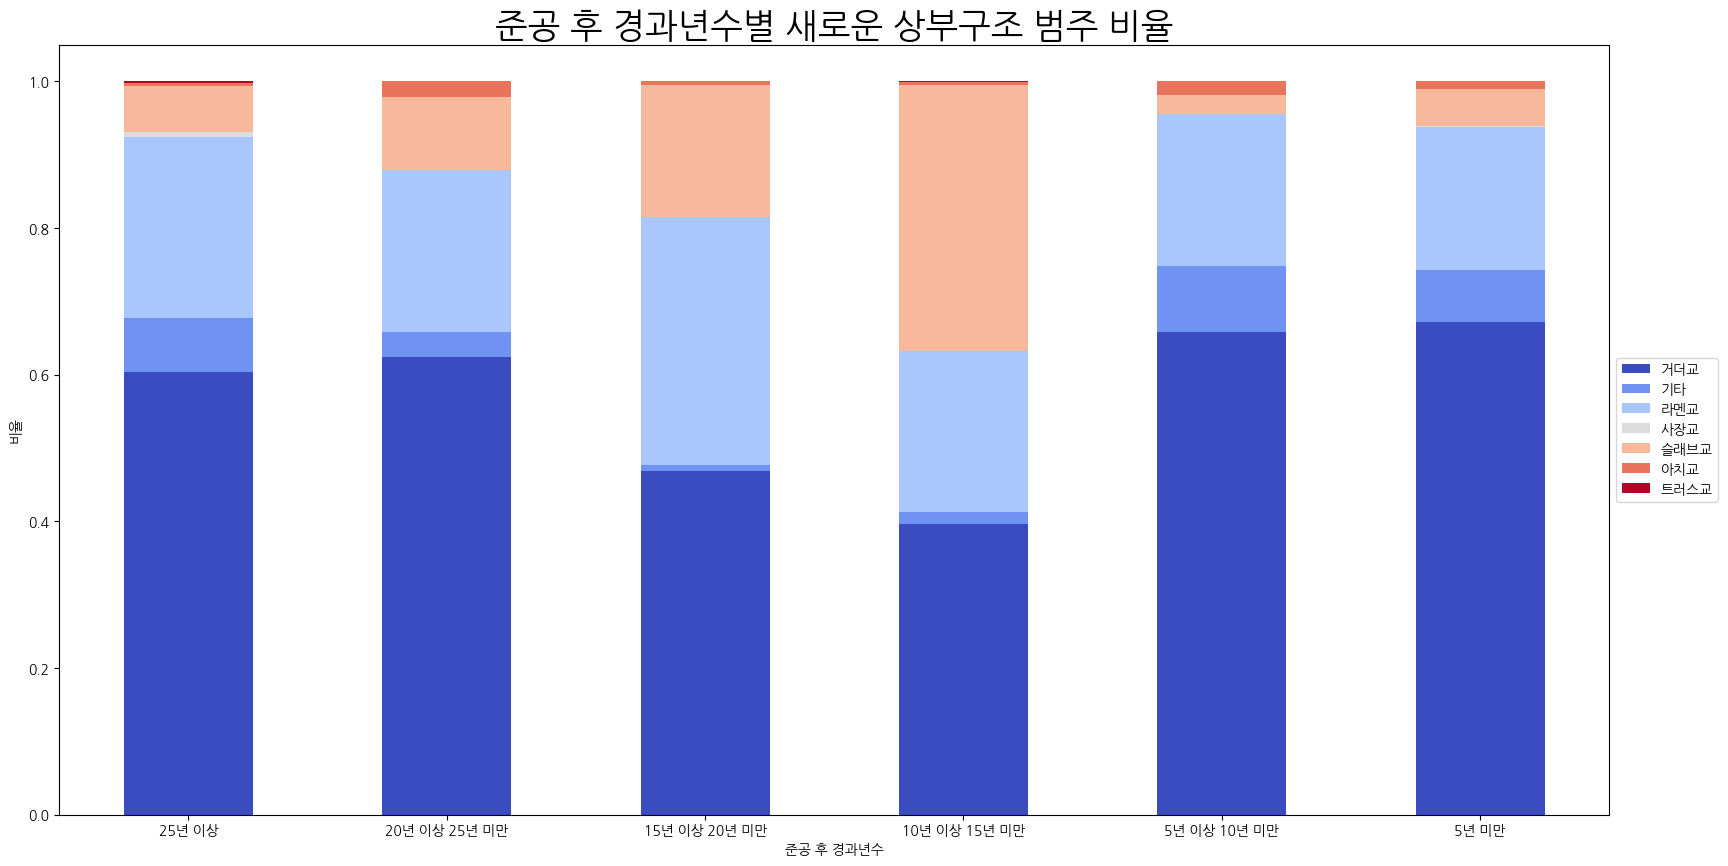

In [30]:
# 준공 후 경과년수별 새로운 상부구조 범주 비율
new2 = copy_df.groupby(['Cum_year', 'New_Struc'])['New_Struc'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
labels = ['25년 이상', '20년 이상 25년 미만',  '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만']

new2.plot(kind = 'bar', stacked = True, figsize = (20,10), cmap = 'coolwarm')
plt.title('준공 후 경과년수별 새로운 상부구조 범주 비율', fontsize = 25)
plt.xlabel('준공 후 경과년수')
plt.ylabel('비율')
plt.xticks(rotation = 0)
plt.xticks(range(len(labels)), labels)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

## 4. 2022교량현황_전처리데이터에서 경과년수에 따른 상부구조 변화 시각화

In [31]:
# 2022교량현황_전처리데이터에 새로운 경과년수 변수 생성
df2['Cum_year'] = df2['준공후경과년수'].apply(lambda x: category_year(x))

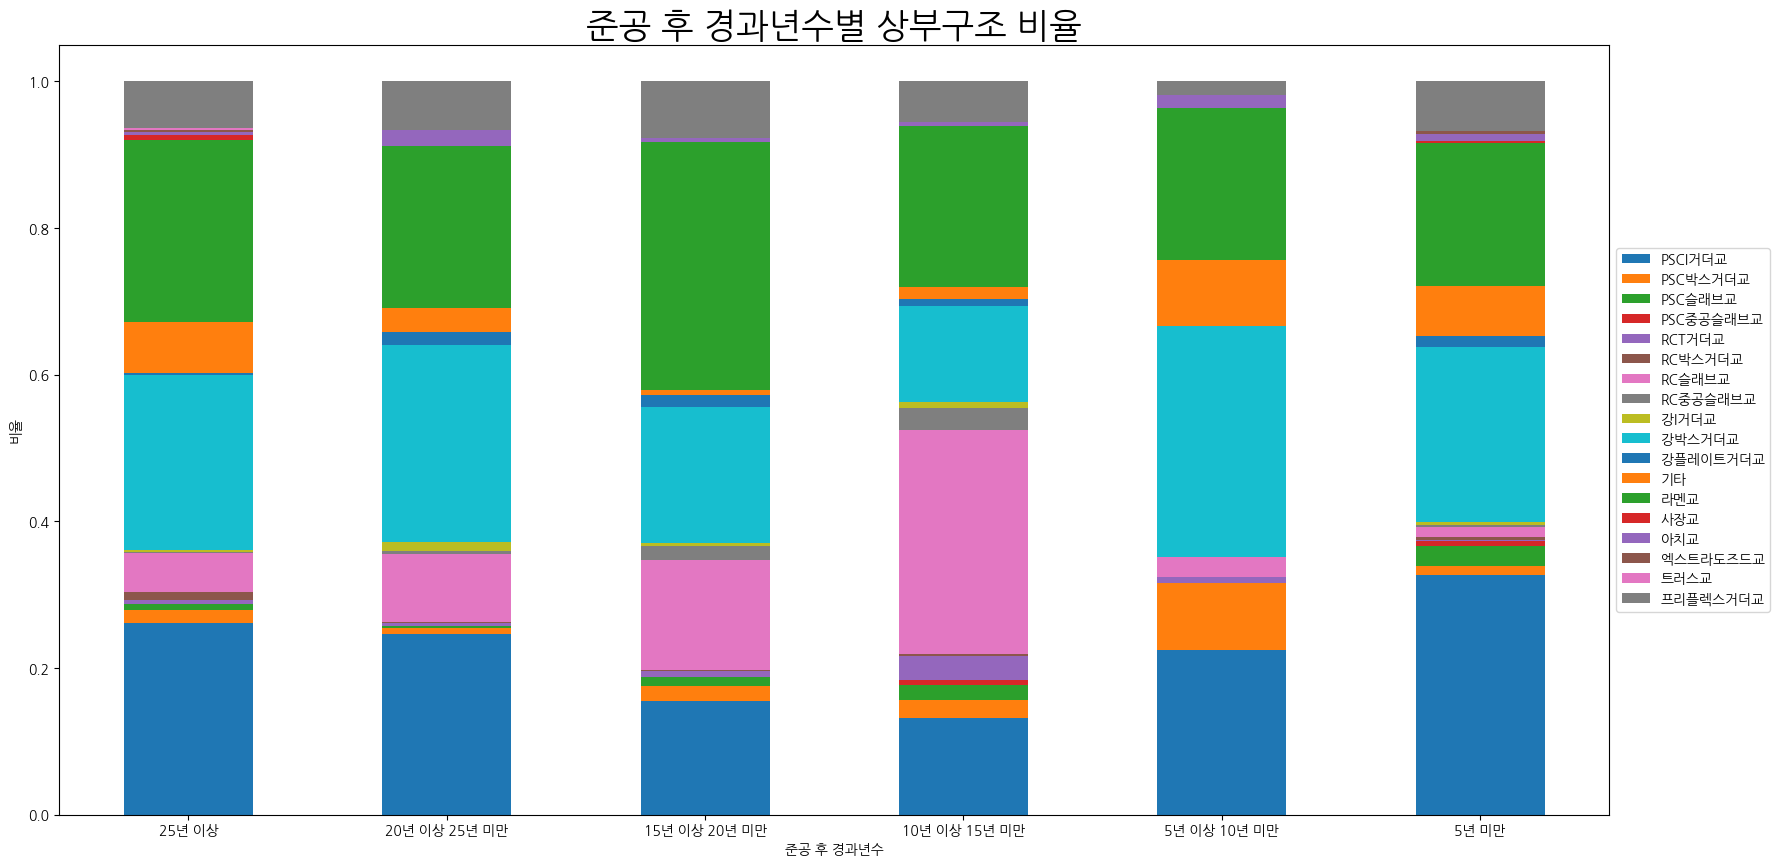

In [32]:
# 준공 후 경과년수별 상부구조 비율
new3 = df2.groupby(['Cum_year', '상부구조'])['상부구조'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
labels = ['25년 이상', '20년 이상 25년 미만',  '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만']
new1.plot(kind = 'bar', stacked = True, figsize = (20,10))
plt.title('준공 후 경과년수별 상부구조 비율', fontsize = 25)
plt.xlabel('준공 후 경과년수')
plt.ylabel('비율')

plt.xticks(rotation = 0)
plt.xticks(range(len(labels)), labels)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

In [33]:
df2.head()

,시설명,시도,시군구,총길이,총폭,경간수,최대경간장,상부구조,설계하중,교통량,준공년도,준공후경과년수,New_Struc,Cum_year
0,가남JCT육교(강릉),경기도,여주군,225.0,16.2,5,45.0,강박스거더교,DB-24,24562.0,1994,29,거더교,25년 이상
1,가남JCT육교(인천),경기도,여주군,225.0,16.2,5,45.0,강박스거더교,DB-24,24562.0,1994,29,거더교,25년 이상
2,가남교(강릉0),경기도,여주군,25.0,19.3,1,25.0,프리플렉스거더교,DB-24,61826.0,2003,20,거더교,20년 이상 25년 미만
3,가남교(강릉1),경기도,여주군,25.0,5.6,1,25.0,PSCI거더교,DB-24,61826.0,2010,13,거더교,10년 이상 15년 미만
4,가남교(인천),경기도,여주군,25.0,19.3,1,25.0,프리플렉스거더교,DB-24,61826.0,2003,20,거더교,20년 이상 25년 미만


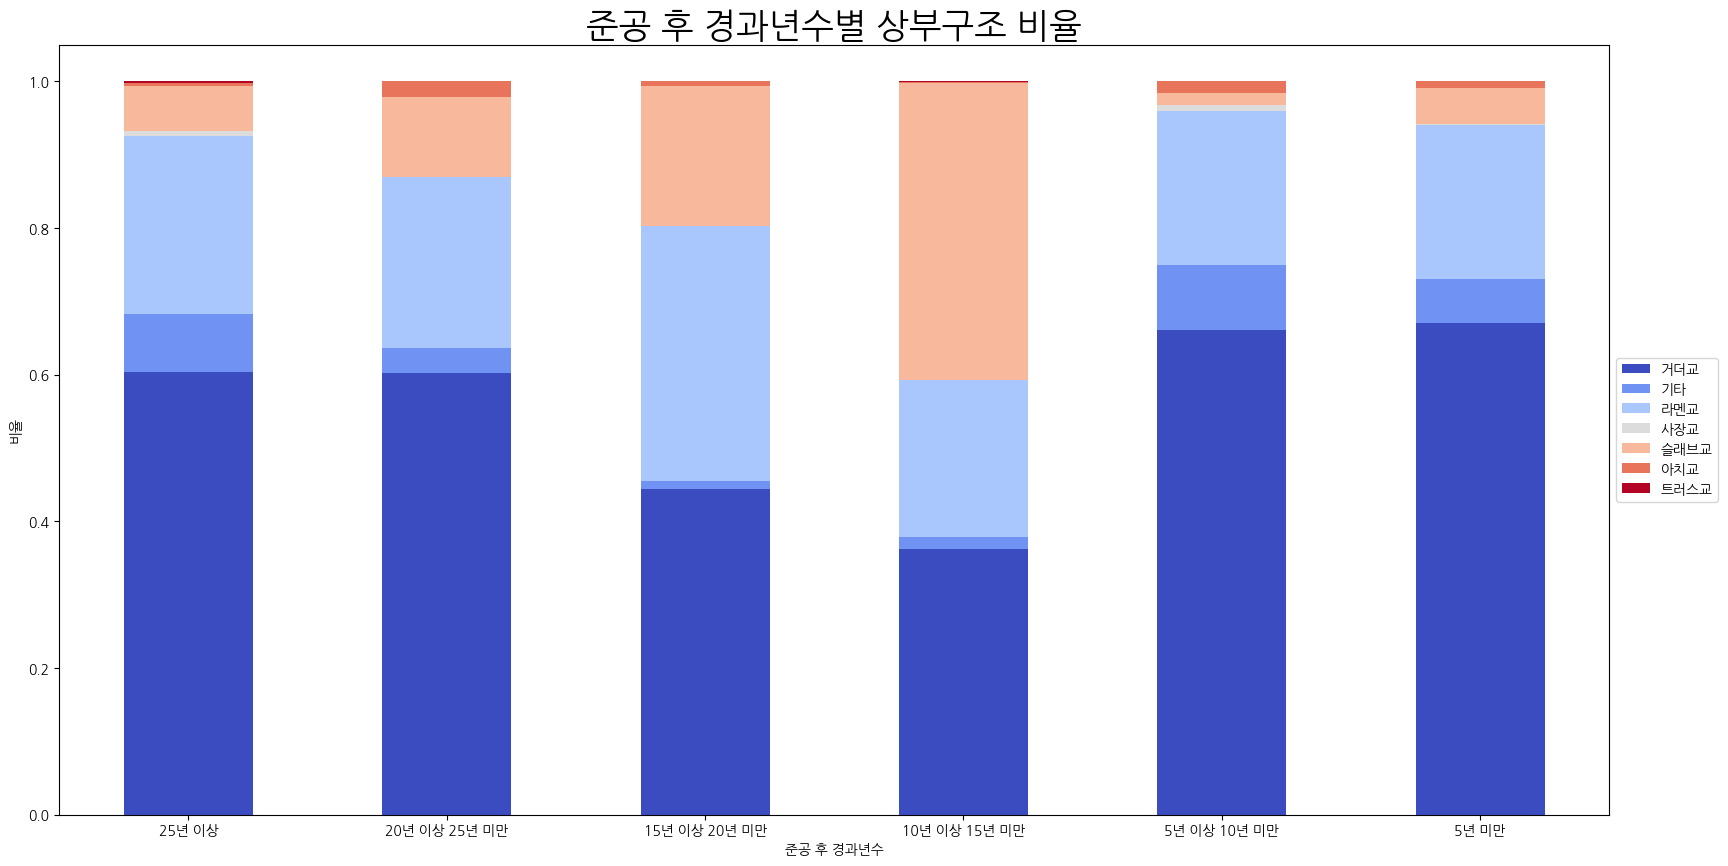

In [34]:
# 준공 후 경과년수별 새로운 상부구조 범주 비율
new4 = df2.groupby(['Cum_year', 'New_Struc'])['New_Struc'].count().unstack().apply(lambda x: x / x.sum(), axis=1)
labels = ['25년 이상', '20년 이상 25년 미만',  '15년 이상 20년 미만', '10년 이상 15년 미만', '5년 이상 10년 미만', '5년 미만']
new4.plot(kind = 'bar', stacked = True, figsize = (20,10), cmap = 'coolwarm')
plt.title('준공 후 경과년수별 상부구조 비율', fontsize = 25)
plt.xlabel('준공 후 경과년수')
plt.ylabel('비율')

plt.xticks(rotation = 0)
plt.xticks(range(len(labels)), labels)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

### 추가적으로 ChatGpt의 도움을 토대로 구현해본것. 코드만 다르고 결과에는 거의 차이가 없다

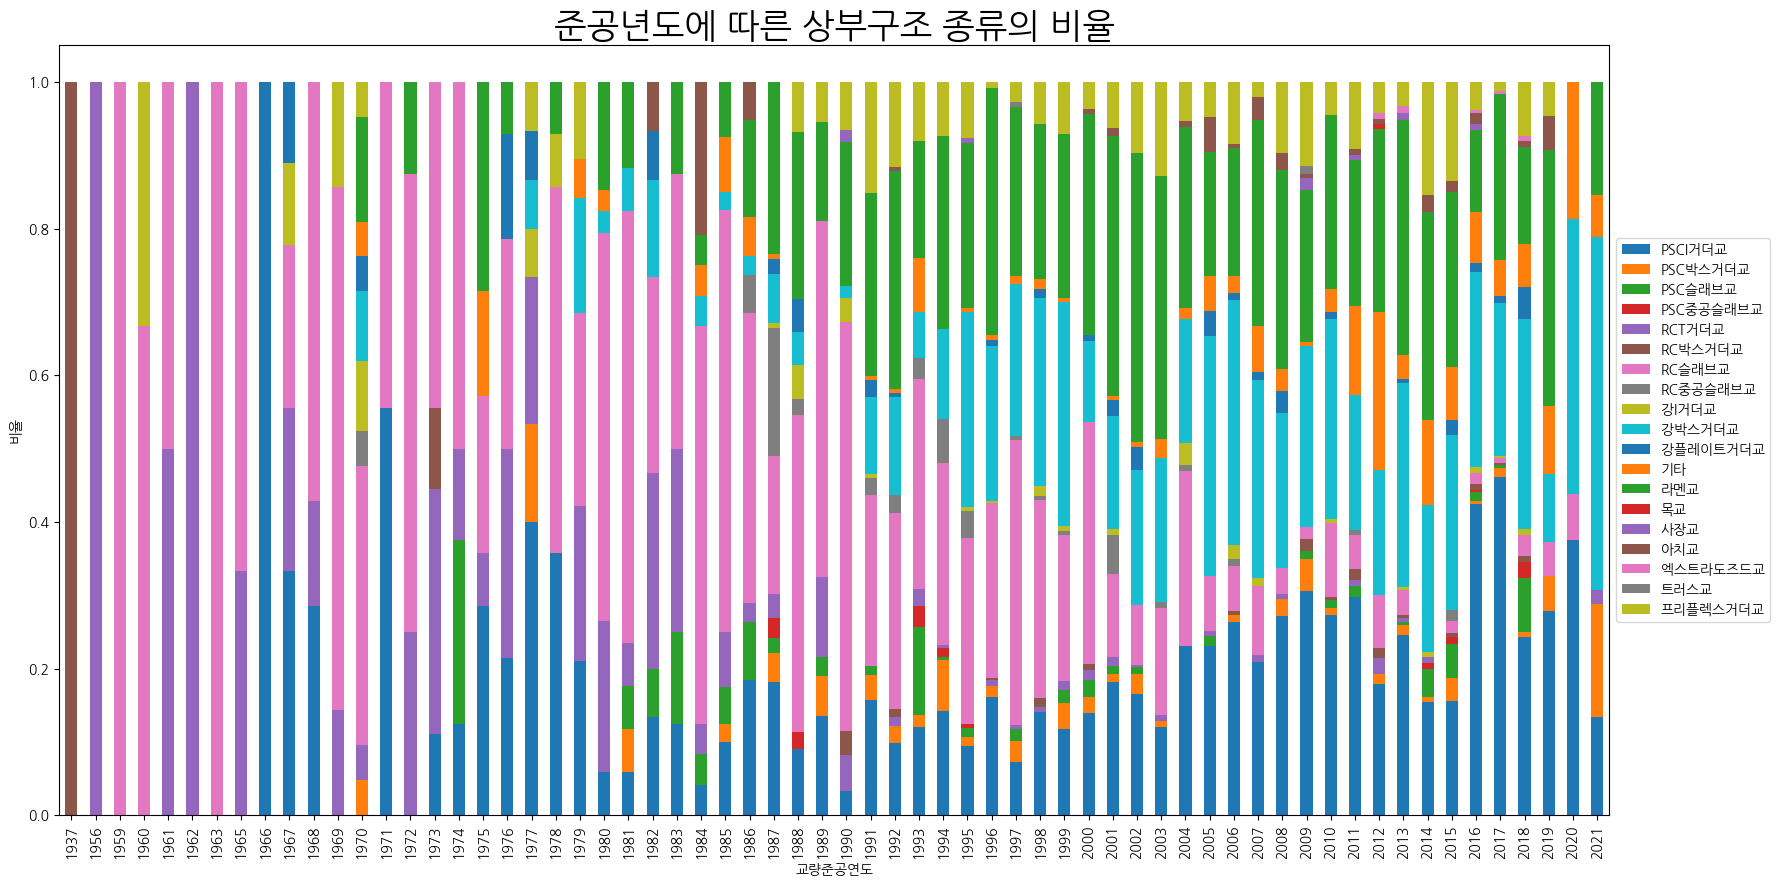

In [35]:
# 교량준공연도에 따른 기존의 상부구조형식 시각화
new_df = df1[['교량준공연도', '상부구조형식']]

# 각 년도별, 구조형식별 개수 계산
df_counts = df1.groupby(['교량준공연도', '상부구조형식']).size().reset_index(name='counts')

# 각 년도별 전체 구조물 개수 계산
df_totals = df_counts.groupby('교량준공연도')['counts'].sum().reset_index(name='total')

# 비율 계산하여 새로운 컬럼으로 추가
df_counts['ratio'] = df_counts.apply(lambda x: x['counts'] / df_totals.loc[df_totals['교량준공연도'] == x['교량준공연도'], 'total'].iloc[0], axis=1)

# 스택 그래프 그리기
df_pivot = df_counts.pivot(index='교량준공연도', columns='상부구조형식', values='ratio')
df_pivot.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.xlabel('교량준공연도')
plt.ylabel('비율')
plt.title('준공년도에 따른 상부구조 종류의 비율', fontsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


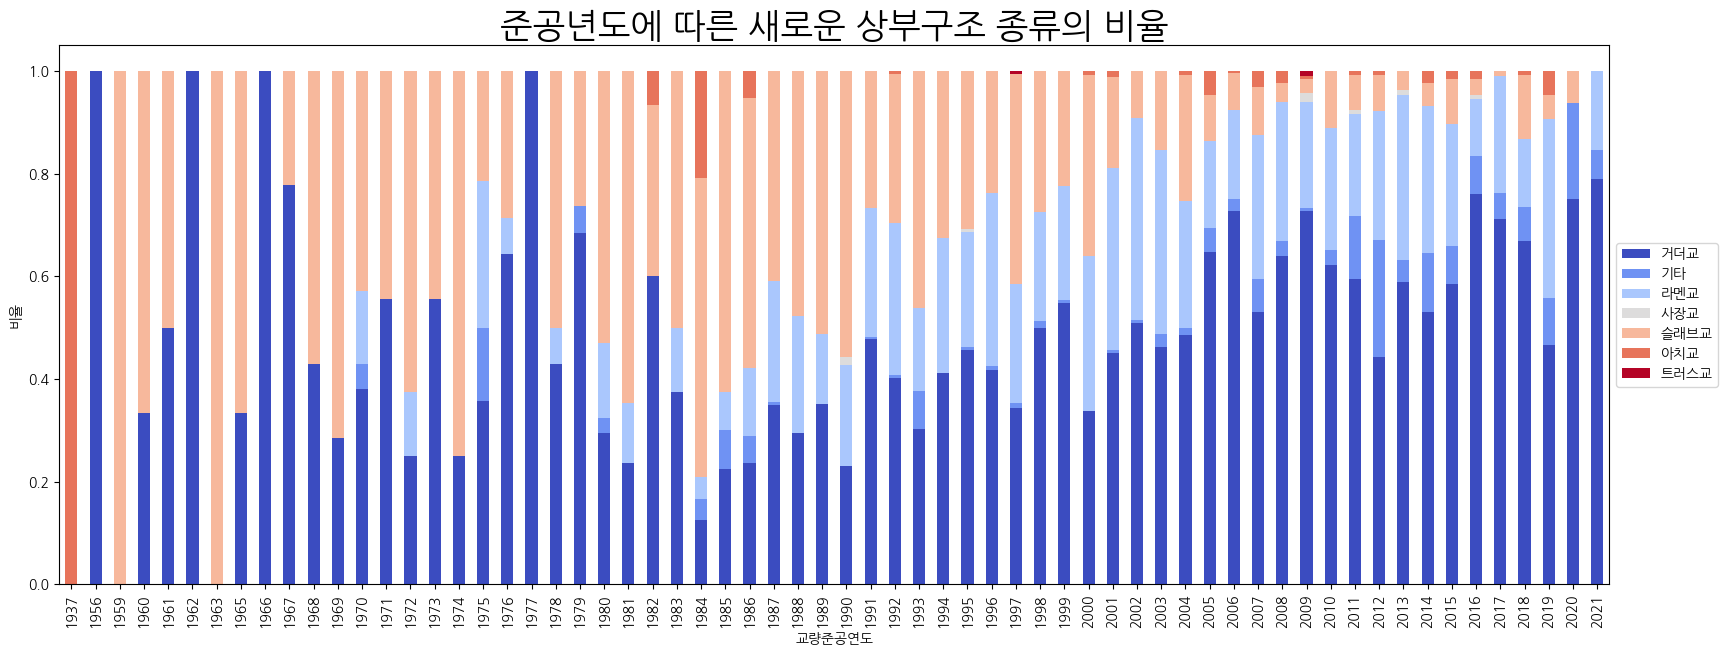

In [36]:
# 교량준공연도와 새로운 상부구조를 시각화
new_df = df1[['교량준공연도', 'New_Struc']]

# 각 년도별, 구조형식별 개수 계산
df_counts = df1.groupby(['교량준공연도', 'New_Struc']).size().reset_index(name='counts')

# 각 년도별 전체 구조물 개수 계산
df_totals = df_counts.groupby('교량준공연도')['counts'].sum().reset_index(name='total')

# 비율 계산하여 새로운 컬럼으로 추가
df_counts['ratio'] = df_counts.apply(lambda x: x['counts'] / df_totals.loc[df_totals['교량준공연도'] == x['교량준공연도'], 'total'].iloc[0], axis=1)

# 스택 그래프 그리기
df_pivot = df_counts.pivot(index='교량준공연도', columns='New_Struc', values='ratio')
df_pivot.plot(kind='bar', stacked=True, cmap = 'coolwarm', figsize=(20, 7))
plt.xlabel('교량준공연도')
plt.ylabel('비율')
plt.title('준공년도에 따른 새로운 상부구조 종류의 비율', fontsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()